In [1]:
from flipper import liteMap
import matplotlib.pyplot as plt
import numpy as np
from cactusLib import filterLib


/home/cvargas/.local/lib/python2.7/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


In [2]:
#%matplotlib auto

In [12]:
#Marsden Area

RA0 = 3.
RA1 = 106.75
DEC0 = -56.2
DEC1 = -49.0


fw0lt = liteMap.liteMapFromFits("/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_220_south_season_2_4way_split0_v3_src_free.fits")
fw1lt = liteMap.liteMapFromFits("/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_220_south_season_2_4way_split1_v3_src_free.fits")
fw2lt = liteMap.liteMapFromFits("/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_220_south_season_2_4way_split2_v3_src_free.fits")
fw3lt = liteMap.liteMapFromFits("/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_220_south_season_2_4way_split3_v3_src_free.fits")

#fwltw = liteMap.liteMapFromFits("/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_220_south_season_2_1way_hits_v3.fits")

#Need to fix
#Every 4way has its own weightmap!!!


In [4]:
owlt = (fw0lt.data-fw1lt.data+fw2lt.data-fw3lt.data)/4.

In [5]:
owltw = fwltw.data*owlt

In [6]:
np.std(owltw)

23262362.080989804

In [7]:
ar2s2lt = liteMap.liteMapFromFits("/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_220_south_season_2_1way_v3_srcfree.fits")
ar2s2lt.data = ar2s2lt.data*fwltw.data
ar2s2lt = ar2s2lt.selectSubMap(RA0,RA1,DEC0,DEC1)

In [8]:
np.std(ar2s2lt.data)

23019164.749387406

In [9]:
lt = fw0lt.copy()
lt.data = owltw
lt = lt.selectSubMap(RA0,RA1,DEC0,DEC1)

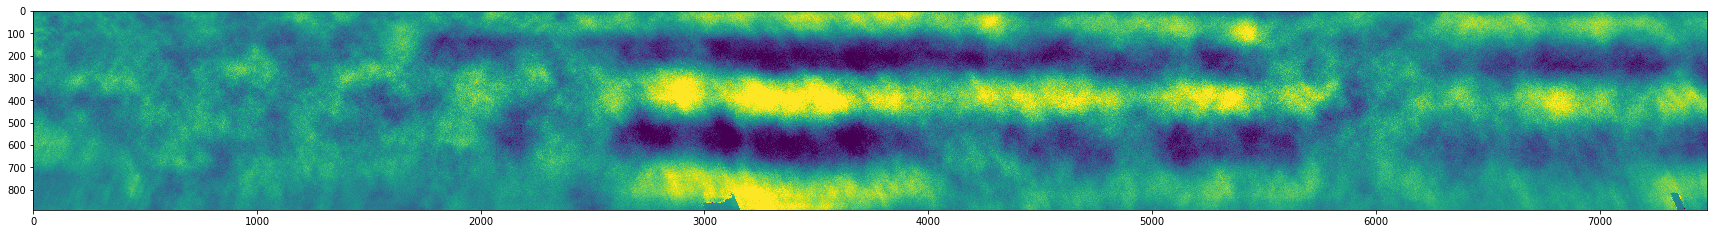

In [10]:
plt.figure(figsize=(30,15))
plt.imshow(lt.data,vmin=-1e8,vmax=1e8)
plt.show()

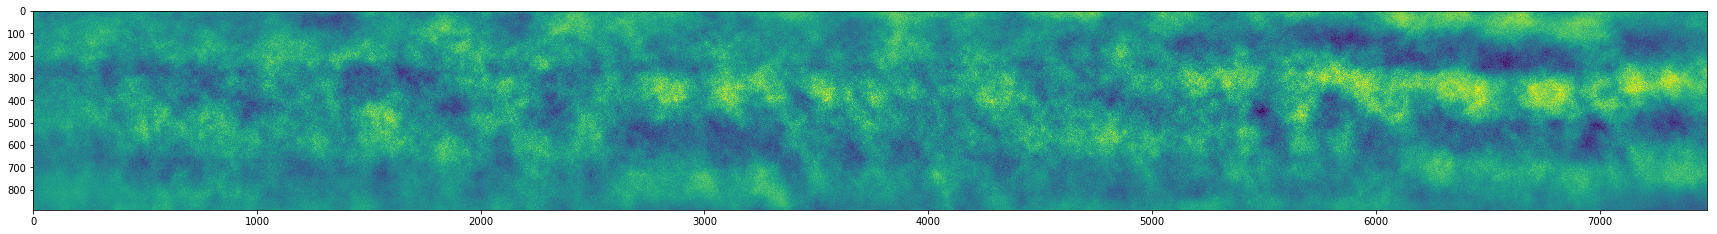

In [11]:
plt.figure(figsize=(30,15))
plt.imshow(ar2s2lt.data,vmin=-1e8,vmax=1e8)
plt.show()